# Linear Regression

## EDA on ads data

In [64]:
# read in the data into pandas dataframe
import pandas as pd
df = pd.read_csv("Advertising.csv", index_col=0)

df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


- Features/indepedent variable: TV, radio, newspaper
- label/target/dependent variable: sales

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [66]:
df.shape

(200, 4)

<Axes: xlabel='TV', ylabel='sales'>

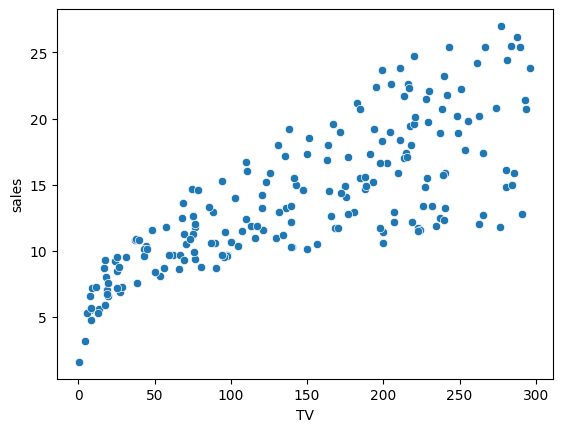

In [67]:
import seaborn as sns 

# one example plot
sns.scatterplot(data = df, x="TV", y="sales")

[Text(0.5, 1.0, 'Newspaper spending vs sales')]

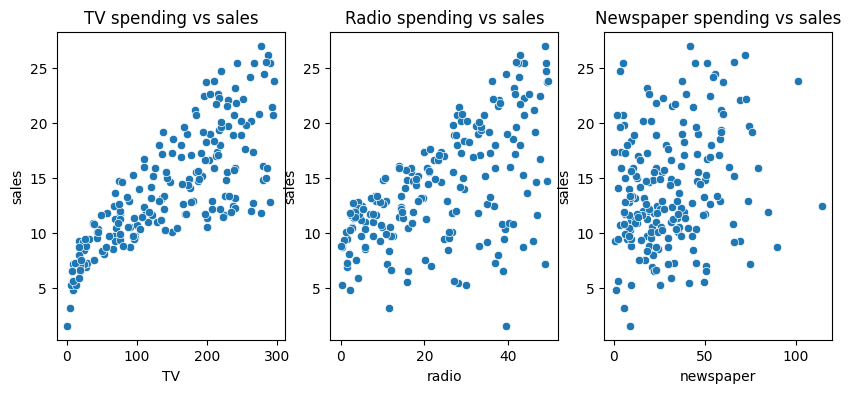

In [68]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(10,4))
sns.scatterplot(data = df, x= "TV", y = "sales", ax = axes[0])
sns.scatterplot(data = df, x= "radio", y = "sales", ax = axes[1])
sns.scatterplot(data = df, x= "newspaper", y = "sales", ax = axes[2])

axes[0].set(title = "TV spending vs sales")
axes[1].set(title = "Radio spending vs sales")
axes[2].set(title = "Newspaper spending vs sales")


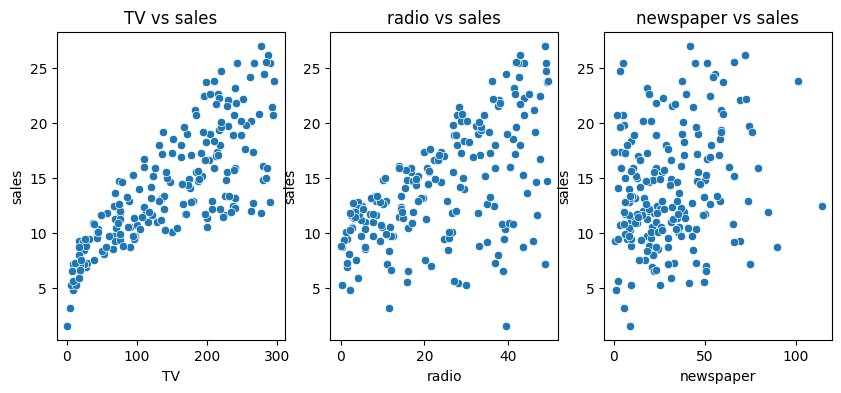

In [69]:
# same as above but put into loop to keep it more DRY
fig, axes = plt.subplots(1, 3, figsize=(10,4))

features = ["TV", "radio","newspaper"]
for feature, ax in zip(features, axes.flatten()):
    sns.scatterplot(data = df, x= feature, y = "sales", ax = ax)
    ax.set(title=f"{feature} vs sales")

## Scikit-learn steps

see this as a recipe to follow, works for most classic machine learning alghoritms with some modifications 

steps:

0. divide into features X and label Y
1. train|test split
2. scale dataset (some algorithms dont need scaling)
3. fit algorithm with trained data
4. transform training data and test data
5. evaluate on test data


### 0. divide into features x and label y

In [70]:
y = df["sales"]
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

In [71]:
#df[["TV", "newspaper", "radio"]]
x = df.drop("sales", axis=1)
x.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [72]:
# tuple unpacking
X, y = df.drop("sales", axis=1), df["sales"]
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

In [73]:
x.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


### 1. train|test split

- possible to do manually, but sklearn has this implemented off the shelf that we can use

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)


print(f"{X_train.shape = }")
print(f"{X_test.shape = }")
print(f"{y_train.shape = }")
print(f"{y_test.shape = }")

X_train.shape = (134, 3)
X_test.shape = (66, 3)
y_train.shape = (134,)
y_test.shape = (66,)


In [75]:
y_test.head(5)

96     16.9
16     22.4
31     21.4
159     7.3
129    24.7
Name: sales, dtype: float64

### 2. scale dataset

commong scaling technique
- min-max also called normalization
- feature standardization 

many algorithms work better or only works when the features as scaled
- values "closer" to each other


for normalization
-  $X' = \frac{X-X_{min}}{X_{max}-X_{min}}$

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# instantiate a MinMaxScaler instance
scaler = MinMaxScaler()

# importan note: fit on X_train and not X_test -> this avoids data leakade
scaler.fit(X_train) # use training data to fit the scaler
 
# transforms or scales X_train and X_test
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

scaled_X_test.shape, scaled_X_train.shape

((66, 3), (134, 3))

In [83]:
scaled_X_train.min(), scaled_X_train.max()

(np.float64(0.0), np.float64(1.0))

In [ ]:
# we have used parameter from X_min and X_max from X_traing to scale X_test
# if you get exactly 0 and 1 here then probably you have fit X_test with would leak data
scaled_X_test.min(), scaled_X_test.max()

(np.float64(0.005964214711729622), np.float64(1.1302186878727631))

### 3. Linear Regression

In [86]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
# put in training data features and label
model.fit(scaled_X_train, y_train)

model.intercept_, model.coef_

(np.float64(2.791159519624367), array([13.20747617,  9.75285112,  0.61108329]))

test manual prediction

In [ ]:
X_test.iloc[0] #not scaled

TV           163.3
radio         31.6
newspaper     52.9
Name: 96, dtype: float64

In [ ]:
# TV, radio, news but scaled
test_sample_feature = scaled_X_test[0]

test_sample_feature

array([0.54988164, 0.63709677, 0.52286282])

In [93]:
w = model.coef_
w0 = model.intercept_

print("prediction on the test sample")
w0 + w[0]*test_sample_feature[0] + w[1]*test_sample_feature[1] + w[2]*test_sample_feature[2]

prediction on the test sample


np.float64(16.586730852231774)

In [94]:
print("label for our test sample")
y_test.iloc[0]

label for our test sample


np.float64(16.9)

### 4. prediction on test data

In [95]:
y_pred = model.predict(scaled_X_test)
y_pred

array([16.58673085, 21.18622524, 21.66752973, 10.81086512, 22.25210881,
       13.31459455, 21.23875284,  7.38400509, 13.43971113, 15.19445383,
        9.01548612,  6.56945204, 14.4156926 ,  8.93560138,  9.56335776,
       12.10760805,  8.86091137, 16.25163621, 10.31036304, 18.83571624,
       19.81058732, 13.67550716, 12.45182294, 21.58072583,  7.67409148,
        5.67090757, 20.95448184, 11.89301758,  9.13043149,  8.49435255,
       12.32217788,  9.99097553, 21.71995241, 12.64869606, 18.25348116,
       20.17390876, 14.20864218, 21.02816483, 10.91608737,  4.42671034,
        9.59359543, 12.53133363, 10.14637196,  8.1294087 , 13.32973122,
        5.27563699,  9.30534511, 14.15272317,  8.75979349, 11.67053724,
       15.66273733, 11.75350353, 13.21744723, 11.06273296,  6.41769181,
        9.84865789,  9.45756213, 24.32601732,  7.68903682, 12.30794356,
       17.57952015, 15.27952025, 11.45659815, 11.12311877, 16.60003773,
        6.90611478])

### 5. Evaluate Performance

How well did we predict $\bf{y}$ (label) with $\hat{\bf{y}}$ (y_pred)?

To answer this question we use several **evaluation metrics** or **loss functions**: 

- Mean Absolute Error (MAE) - mean of error between $\bf{y}$ and ${\hat{\bf{y}}}$. The unit is same as measured quantity.

$$MAE = \frac{1}{m}\sum_{i=1}^m |y_i - \hat{y}_i|$$

- Mean Squared Error (MSE) - mean of squared errors between $\bf{y}$ and ${\hat{\bf{y}}}$. It punishes large errors, and the units are in square units of the measured quantity

$$MSE = \frac{1}{m}\sum_{i=1}^m (y_i - \hat{y}_i)^2$$

- Root Mean Squared Error (RMSE) - square root of MSE between $\bf{y}$ and ${\hat{\bf{y}}}$. It punishes large errors, and the units are same as measured quantity, hence easier to interpret.

$$RMSE = \sqrt{\frac{1}{m}\sum_{i=1}^m (y_i - \hat{y}_i)^2}$$

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np 

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)


mae, mse, rmse

(1.4937750024728977, 3.7279283306815176, np.float64(1.9307843822347222))

take the evulation metrics and compare it to other models

ex:
- linear regression gave us RMSE = 1.93
- random forest gave us RMSE = 1.75

-> choose random forest